# 教師なし学習

## クラスタリング
### K-means

irisの特徴量`petal_length`と`petal_width`を用いて、クラスタリング手法の一つであるK-meansを使ってクラスタリングします

K-meansではクラスタの数を指定する必要があります。ここでは3つのクラスタを生成します。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names).reset_index(drop=True)
target = pd.DataFrame(data.target, columns = ['species']).reset_index(drop=True)
df = df.merge(target, left_index=True, right_index=True, )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_iris=df[['petal length (cm)', 'petal width (cm)']]

model = KMeans(n_clusters=3) # k-meansモデル、n_clustersでクラスタの数を指定
model.fit(X_iris) # モデルをデータに適合
y_km=model.predict(X_iris) # クラスタを予測

/Users/yuyashibu/anaconda3/envs/iiimethodsiv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


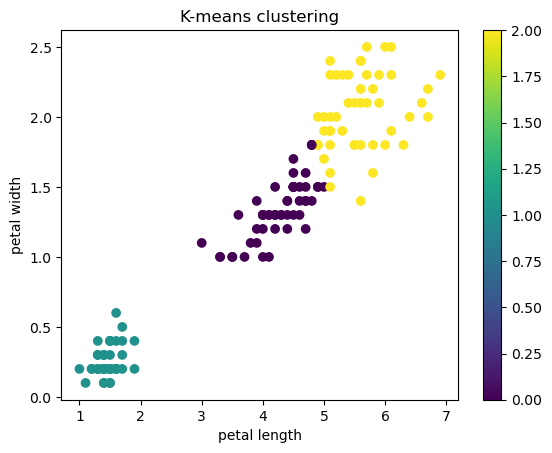

In [4]:
plt.figure()
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = y_km)
plt.colorbar()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K-means clustering')
plt.show()

### PCA（主成分分析）次元削減

高次元のデータの次元数を削減するために用いられることも多いです。

ここでは、irisデータの4つの特徴量を2次元にPCAを用いて削減します。

In [5]:
X = df.iloc[:, :4]
y = df['species']

PCAを実行する前に標準化します。

In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [8]:
X_pca[:2,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356]])

In [9]:
X[:2,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

どのくらいデータを説明できているか、寄与率(explained_variance_ratio)を用いて確認します。

PCAの説明分散（または固有値）は、各主成分に帰属させることができる分散を示します。
各値は各主成分の分散に等しく、配列の長さは n_components で定義された成分の数に等しくなります。

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


第一主成分と第二主成分をプロットしましょう。

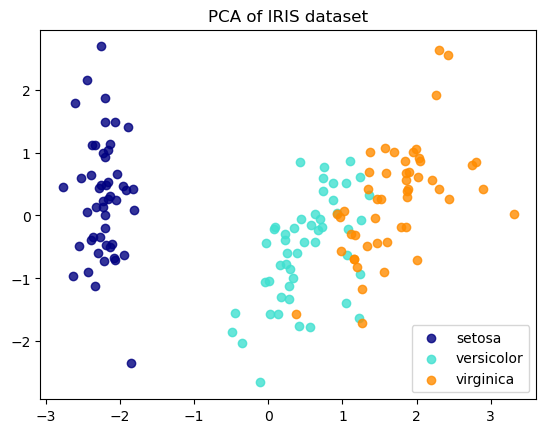

In [11]:
colors = ['navy', 'turquoise', 'darkorange']
target_names =  ['setosa','versicolor','virginica']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()